Lab Activity#1: **SIR Models** <br>
Pino, Rosario, Glorioso, Tan <br>
Date: put date submitted

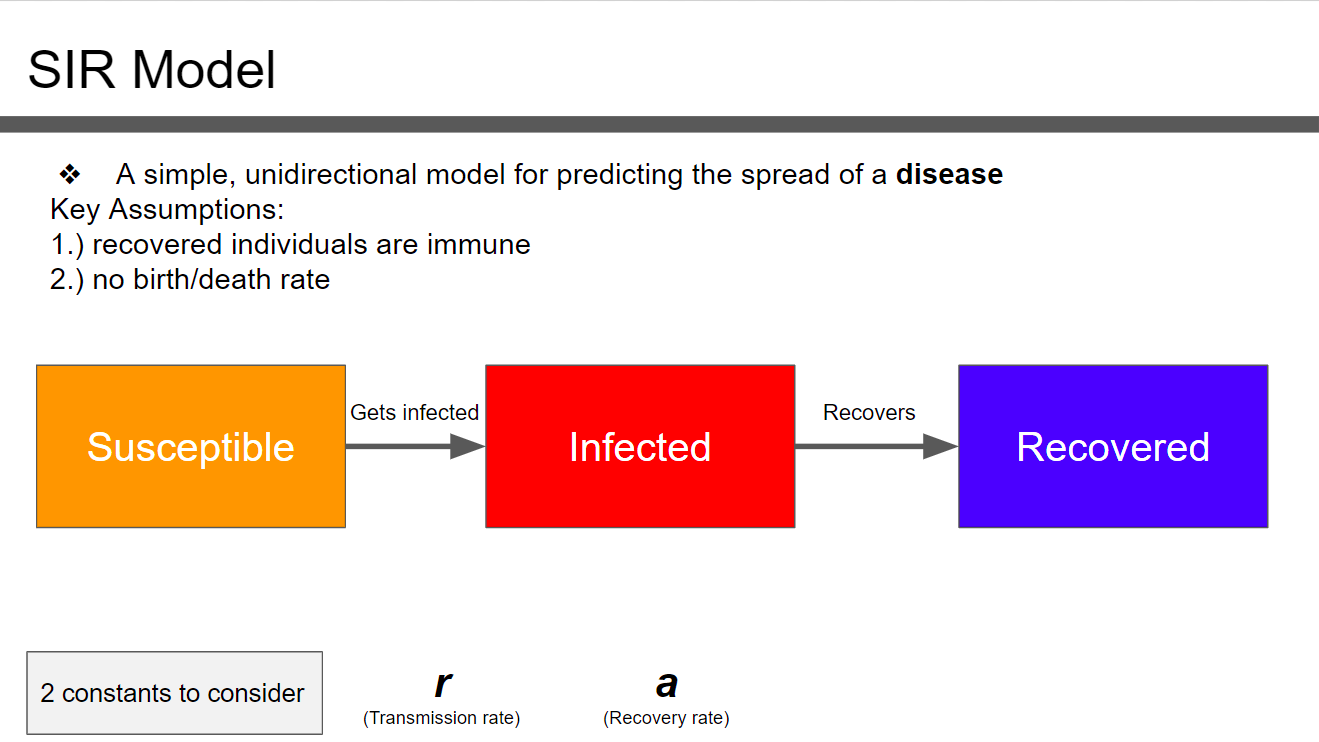

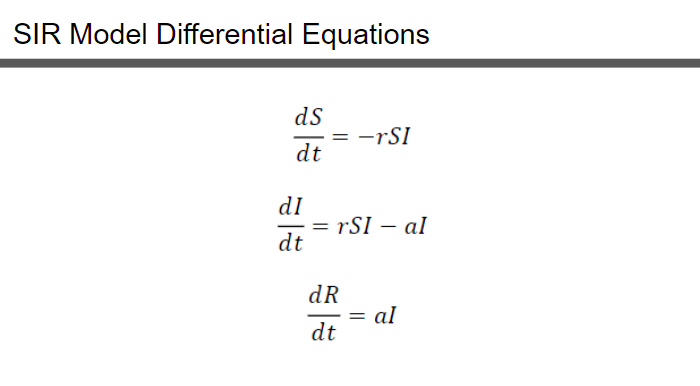

$

## Problem 1

Suppose that, in a city of approximately three million, five people who have just become infectious have recently entered the city carrying a certain disease. Each of those individuals have one contact each day that could spread the disease, and an average of three days is spent in the infectious 
state. Find the solution of the corresponding SIR equations using solve_ivp for fifty days, where each 
time period is half a day, and plot your results. Use the percentages of each state, not the actual number 
of people in the state.

At the peak of the infection, how many in the city will still be able to work (assume for simplicity that 
those who are in the infectious state either cannot go to work or are unproductive, etc.)?

Hint: Use the t-values parameter in solve_ivp to pass in an array of t-values. Also, assume that 
your b value is equal to 1.

Compare your plot to the figure below.

### Example figure

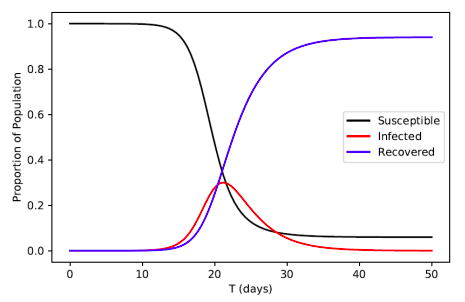

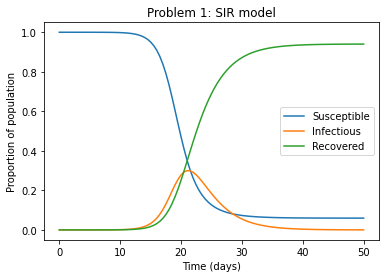

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate

# Define the ODE function
def SIR_model(t,y):
    # Define the  values of S, I, and R comprising input y.
    S, I, R = y
    # Define the differential equations describing change of S, I, and R.
    dS_dt = -r*S*I
    dI_dt = r*S*I - a*I
    dR_dt = a*I
    # Return the differential equations.
    return np.array([dS_dt,dI_dt,dR_dt])

# Initial Conditions
# S, I, and R are proportions which sum to 1.
# The total population is approximately 3 million people.
S_0 = 3000000/3000005
# Initially, 5 people are infected.
I_0 = 5/3000005
# Initially, there are no recoveries.
R_0 = 0.0
# Combine the values in an array corresponding to the array in the ODE function.
y_0 = np.array([S_0, I_0, R_0])

# Define constants.
# Each individual has one contact per day which spreads the disease, with 100% probability to infect
r = 1
# An individual remains infectious for 3 days before recovering.
a = 1/3

# Time Series
# We simulate 50 days, where each time period is half a day.
time_period = (0,50)
time_values = np.linspace(0,50, 101)

# Result and Plotting
# solve_ivp function uses the following inputs:
sol = scipy.integrate.solve_ivp(
    # The ODE function,
    SIR_model,
    # The time interval,
    time_period,
    # The initial state, 
    y_0, 
    # The t-values at which the function is evaluated.
    t_eval=time_values
    )

# solve_ivp outputs sol.t (array of t, same as t_eval), and sol.y (arrays of values of S, I, and R at times t)
# Plot these arrays with legend, axis labels and title.
plt.plot(sol.t,sol.y[0], label="Susceptible")
plt.plot(sol.t,sol.y[1], label="Infectious")
plt.plot(sol.t,sol.y[2], label="Recovered")
plt.legend()
plt.xlabel("Time (days)")
plt.ylabel("Proportion of population")
plt.title("Problem 1: SIR model")
plt.show()

Able population at the peak of the infection

In [ ]:
np.round((1-sol.y[1].max())*3000005, 0)

2100169.0

## Problem 2

On March 11, 2020, New York City had 52 confirmed cases of Covid-19. On that day New York 
started its lockdown measures. Using the following information, model what the spread of the virus could 
have been, using solve_ivp, if New York did not implement any measures to curb the spread of the virus 
over the next 150 days:

* there are approximately 8.399 million people in New York city,
* the average case of Covid-19 lasts for 10 days,
* and each infected person can spread the virus to 2.5 people.
* Also, assume your b value is equal to 0.1.

Plot your results for each day.

1) At the projected peak, how many concurrent active cases are there?

2) Assuming that about 5% of Covid-19 cases require hospitalization, and using the fact that there 
are about 58,000 hospital beds in NYC, how many beds over capacity will the hospitals in NYC be at the 
projected peak?

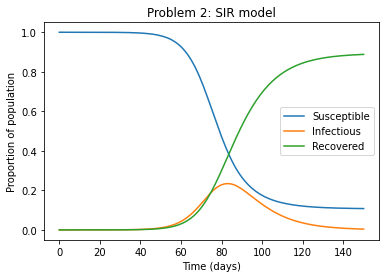

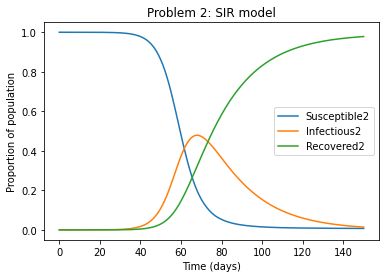

In [ ]:
# Define the ODE function
def ode(t,y):
    # Alternative method of defining S, I, and R.
    S = y[0]
    I = y[1]
    R = y[2]
    dS_dt = -r*S*I
    dI_dt = r*S*I - a*I
    dR_dt = a*I
    return ([dS_dt,dI_dt,dR_dt])

# Initial Conditions
# Initially, there are 52 confirmed cases.
S0 = 8398948/8399000
I0 = 52/8399000
R0 = 0.0
# Each infected person spreads the virus to 2.5 people, but there is only 10% probability of infection
r = 0.1*2.5
# The infection lasts for 10 days.
a = 1/10

# Time Vector
t = np.linspace(0,150, 151)

# Result and Plotting
sol = scipy.integrate.solve_ivp(
    ode, 
    # Time period (150 days)
    (0,150), 
    # Alternative method of passing y_0
    [S0,I0,R0], 
    t_eval=t)

plt.plot(sol.t,sol.y[0], label="Susceptible")
plt.plot(sol.t,sol.y[1], label="Infectious")
plt.plot(sol.t,sol.y[2], label="Recovered")
plt.legend()
plt.xlabel("Time (days)")
plt.ylabel("Proportion of population")
plt.title("Problem 2: SIR model")
plt.show()

def ode_2(t,y):
    # Alternative method of defining S, I, and R.
    S = y[0]
    I = y[1]
    R = y[2]
    dS_dt = -r*S*I
    dI_dt = r*S*I - a_2*I
    dR_dt = a_2*I
    return ([dS_dt,dI_dt,dR_dt])

a_2 = 1/20

sol2 = scipy.integrate.solve_ivp(
    ode_2, 
    # Time period (150 days)
    (0,150), 
    # Alternative method of passing y_0
    [S0,I0,R0], 
    t_eval=t)

plt.plot(sol2.t,sol2.y[0], label="Susceptible2")
plt.plot(sol2.t,sol2.y[1], label="Infectious2")
plt.plot(sol2.t,sol2.y[2], label="Recovered2")
plt.legend()
plt.xlabel("Time (days)")
plt.ylabel("Proportion of population")
plt.title("Problem 2: SIR model")
plt.show()

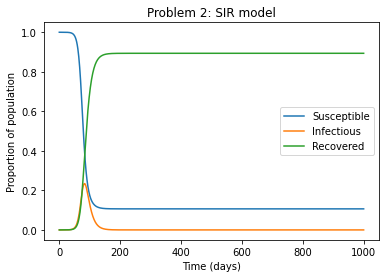

In [ ]:
# Define the ODE function
def ode(t,y):
    # Alternative method of defining S, I, and R.
    S = y[0]
    I = y[1]
    R = y[2]
    dS_dt = -r*S*I
    dI_dt = r*S*I - a*I
    dR_dt = a*I
    return ([dS_dt,dI_dt,dR_dt])

# Initial Conditions
# Initially, there are 52 confirmed cases.
S0 = 8398948/8399000
I0 = 52/8399000
R0 = 0.0
# Each infected person spreads the virus to 2.5 people, but there is only 10% probability of infection
r = 0.1*2.5
# The infection lasts for 10 days.
a = 1/10

# Time Vector
t = np.linspace(0,1000, 1001)

# Result and Plotting
sol = scipy.integrate.solve_ivp(
    ode, 
    # Time period (150 days)
    (0,1000), 
    # Alternative method of passing y_0
    [S0,I0,R0], 
    t_eval=t)

plt.plot(sol.t,sol.y[0], label="Susceptible")
plt.plot(sol.t,sol.y[1], label="Infectious")
plt.plot(sol.t,sol.y[2], label="Recovered")
plt.legend()
plt.xlabel("Time (days)")
plt.ylabel("Proportion of population")
plt.title("Problem 2: SIR model")
plt.show()

Highest concurrent cases

In [ ]:
np.round(sol.y[1].max()*8399000)

1967559.5438643338

Number of patients that require hospitalization.

In [ ]:
np.round(sol.y[1].max()*8399000*0.05,0)-58000

40378.0

The city of New York does not have enough hospital beds for all of the infected.

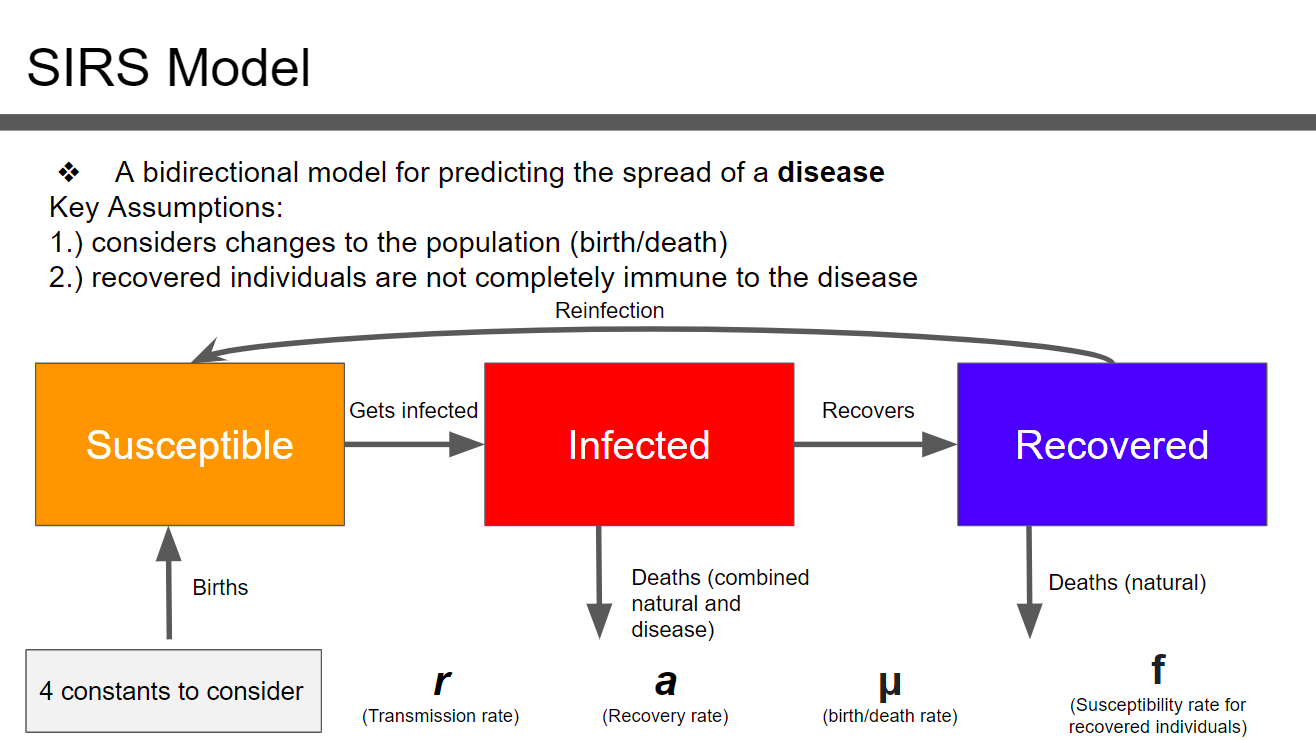

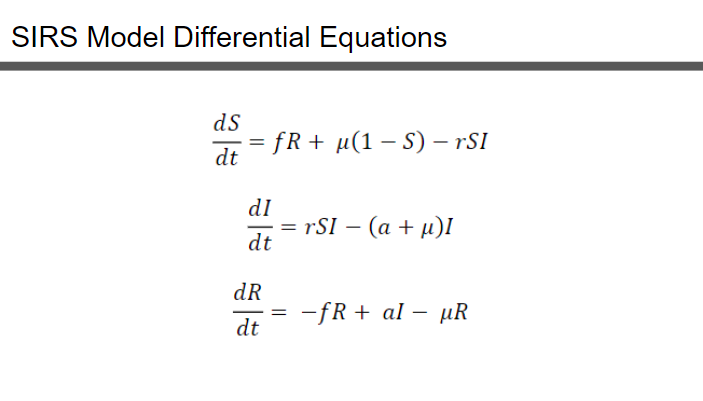

## Problem 3

There are 7 billion people in the world. Influenza, or the flu, is one of those viruses that everyone 
can be susceptible to, even after recovering. The flu virus is able to change in order to evade our immune 
system, and we become susceptible once more, although technically it is now a different strain. Suppose 
the virus originates with 1000 people in Texas after Hurricane Harvey flooded Houston, and stagnant water 
allowed the virus to proliferate.

According to WebMD, once you get the virus, adults are contagious up to a week and kids up to 2 weeks. 
For this lab, suppose you are contagious for 10 days before recovering. Also suppose that on average 
someone makes one contact every two days that could spread the flu. Since we can catch a new strain of 
the flu, suppose that a recovered individual becomes susceptible again with probability 𝑓 = 1/50. The flu 
is also known to be deadly, killing hundreds of thousands every year on top of the normal death rate. To 
assure a steady population, let the birth rate balance out the death rate, and in particular let 𝜇 = 0.0001.
Lastly, assume your b value is equal to 1.

Using the SIRS model above, plot the proportion of population that is Susceptible, Infected, and Recovered 
over a year span (365 days)

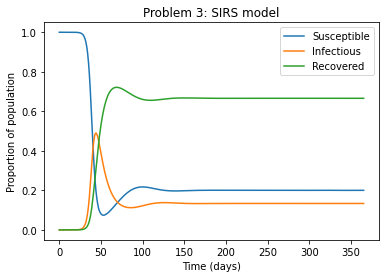

In [ ]:
# Define the ODE system
def ode(t,y):
    S = y[0]
    I = y[1]
    R = y[2]
    # New differential equations for SIRS model
    dS_dt = f*R + mu*(1-S) - r*S*I
    dI_dt = r*S*I - (a + mu)*I
    dR_dt = -f*R + a*I - mu*R

    return ([dS_dt,dI_dt,dR_dt])

# Initial Conditions
S0 = 6999999000/7000000000
# The virus originates with 1000 people
I0 = 1000/7000000000
R0 = 0.0
# One contact every two days, 100% probability to infect
r = 1*0.5
# Infectious for 10 days
a = 1/10
# Recovered individuals may become susceptible again
f = 1/50
# Equal birth and death rate, assumes stready population.
mu = 0.0001

# Time Vector
time_period = (0,365)
time_values = np.arange(0,366)

# Result and Plotting
sol = scipy.integrate.solve_ivp(ode, time_period, [S0,I0,R0], t_eval=time_values)
plt.plot(sol.t,sol.y[0], label="Susceptible")
plt.plot(sol.t,sol.y[1], label="Infectious")
plt.plot(sol.t,sol.y[2], label="Recovered")
plt.legend()
plt.xlabel("Time (days)")
plt.ylabel("Proportion of population")
plt.title("Problem 3: SIRS model")
plt.show()